# Train a JointVAE model

### Get MNIST data
Build a simple JointVAE model on MNIST

In [1]:
from utils.dataloaders import get_mnist_dataloaders, get_celeba_dataloader
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import os
import torch
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

IMAGE_PATH = 'img_align_celeba/'
image_size = 64
# SAMPLE_PATH = '../'

# if not os.path.exists(SAMPLE_PATH):
#     os.makedirs(SAMPLE_PATH)
    
    
transform = transforms.Compose([
    #transforms.Scale(image_size),
    transforms.Resize(image_size),
    transforms.CenterCrop((image_size,image_size)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
data_loader = ImageFolder(IMAGE_PATH, transform)


#data_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True, num_workers=8, drop_last=True)
valid_loader, train_loader, test_loader = get_celeba_dataloader(data_loader, 
                                                                batch_size=128)
test_batch = iter(test_loader)
test_batch = next(test_batch)
new_labels =torch.tensor(test_batch[1])
print(torch.tensor(test_batch[0]).shape)
#latent_dist = model.encode(torch.tensor(test_batch[0]).cuda())




162079 20259 20261
torch.Size([128, 3, 64, 64])


/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


### Define latent distribution of the model

In [2]:
from utils.dataloaders import get_mnist_dataloaders, get_celeba_dataloader 
from torchvision import transforms 
from torchvision.datasets import ImageFolder 
from torch.utils.data import DataLoader 
import os 
import torch
from jointvae.models_f import VAE
from jointvae.training import Trainer
from torch import optim
from viz.visualize_c import Visualizer
import matplotlib.pyplot as plt
import numpy as np



#valid_loader, train_loader, test_loader = get_mnist_dataloaders(batch_size=64)

# Latent distribution will be joint distribution of 10 gaussian normal distributions  7-14
# and one 10 dimensional Gumbel Softmax distribution
n_cont = 64
disc = [10]
n_disc = len(disc)
latent_spec = {'cont': n_cont,
               'disc': disc}

device = torch.device('cuda')
model = VAE(latent_spec=latent_spec, img_size=(3, 64, 64)).cuda()
# model = VAE(latent_spec=latent_spec, img_size=(1, 32, 32)).cuda()
print(model)


lr=5e-4
# Build optimizer
optimizer = optim.Adam(model.parameters(), lr=lr)
# Define the capacities
# Continuous channels
gamma=1.0
cont_capacity = [0.0, 0.0, 25000, gamma]  # Starting at a capacity of 0.0, increase this to 5.0
                                         # over 25000 iterations with a gamma of 30.0
# Discrete channels
disc_capacity = [0.0, 0.0, 25000, gamma]  # Starting at a capacity of 0.0, increase this to 5.0
                                         # over 25000 iterations with a gamma of 30.0


lambda_d = 2
lambda_od = 10*lambda_d
lambda_dis = 20*lambda_d 
path="ReportFig/PVAE/face/cont_{}/gamma_ {}lambda{}".format(n_cont,gamma,lambda_d)
# Build a trainer
trainer = Trainer(model, optimizer,
                  cont_capacity=cont_capacity,
                  disc_capacity=disc_capacity,lambda_d = lambda_d,
                  lambda_od = lambda_od, lambda_dis = lambda_dis )
# Build a visualizer which will be passed to trainer to visualize progress during training
viz = Visualizer(model)

L0Pair(256 -> 2*64, droprate_init=0.2, lamba=0.1, temperature=0.05, weight_decay=0.001, local_rep=False)
VAE(
  (img_to_features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
    (6): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (7): ReLU()
  )
  (features_to_hidden): Sequential(
    (0): Linear(in_features=1024, out_features=256, bias=True)
    (1): ReLU()
  )
  (fc_latent): Sequential(
    (0): L0Pair(256 -> 2*64, droprate_init=0.2, lamba=0.1, temperature=0.05, weight_decay=0.001, local_rep=False)
  )
  (fc_alphas): ModuleList(
    (0): Linear(in_features=256, out_features=10, bias=True)
  )
  (latent_to_features): Sequential(
    (0): Linear(in_features=74, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_fe

### Build a model

### Train the model

from jointvae.training import Trainer


trainer._train_epoch(train_loader,valid_loader)

In [3]:
# Train model for 10 epochs
# Note this should really be a 100 epochs and trained on a GPU, but this is just to demo
###1e-5 6859 1e-4 6727 5e-4 6722 try tanh/L1 loss/beta--->DIP
import time

start = time.time()
trainer.train(train_loader,valid_loader, epochs=100, save_training_gif=('./training.gif', viz))
end = time.time()
print(end - start)
torch.save(model.state_dict(), 'model16f_params.pkl')
torch.save(model, './model16f')
##15.078 - 0.0147  17.209 - 0.0168 error tanh 
##LR 1e-3 0.019-0.023 worse should pick 5e-4
##PLOT THE CURVE!!!!!
###3360

/data/anaconda/envs/py35/lib/python3.5/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


0/162079	Loss: 4875.257	L0 Loss: 10.170
6400/162079	Loss: 4247.503	L0 Loss: 10.161
12800/162079	Loss: 3225.543	L0 Loss: 10.158
19200/162079	Loss: 2700.696	L0 Loss: 10.158
25600/162079	Loss: 2340.759	L0 Loss: 10.158
32000/162079	Loss: 2157.552	L0 Loss: 10.159
38400/162079	Loss: 1979.481	L0 Loss: 10.161
44800/162079	Loss: 1885.739	L0 Loss: 10.164
51200/162079	Loss: 1843.861	L0 Loss: 10.164
57600/162079	Loss: 1822.441	L0 Loss: 10.166
64000/162079	Loss: 1795.677	L0 Loss: 10.167
70400/162079	Loss: 1765.099	L0 Loss: 10.168
76800/162079	Loss: 1709.149	L0 Loss: 10.170
83200/162079	Loss: 1672.751	L0 Loss: 10.171
89600/162079	Loss: 1654.044	L0 Loss: 10.172
96000/162079	Loss: 1650.658	L0 Loss: 10.173
102400/162079	Loss: 1652.075	L0 Loss: 10.174
108800/162079	Loss: 1632.261	L0 Loss: 10.175
115200/162079	Loss: 1599.707	L0 Loss: 10.176
121600/162079	Loss: 1570.716	L0 Loss: 10.178
128000/162079	Loss: 1681.852	L0 Loss: 10.180
134400/162079	Loss: 1592.625	L0 Loss: 10.181
140800/162079	Loss: 1583.903	L0

70400/162079	Loss: 976.665	L0 Loss: 10.510
76800/162079	Loss: 976.027	L0 Loss: 10.512
83200/162079	Loss: 982.293	L0 Loss: 10.514
89600/162079	Loss: 983.858	L0 Loss: 10.515
96000/162079	Loss: 973.050	L0 Loss: 10.517
102400/162079	Loss: 978.621	L0 Loss: 10.518
108800/162079	Loss: 974.440	L0 Loss: 10.520
115200/162079	Loss: 967.465	L0 Loss: 10.521
121600/162079	Loss: 963.700	L0 Loss: 10.522
128000/162079	Loss: 974.259	L0 Loss: 10.523
134400/162079	Loss: 970.594	L0 Loss: 10.524
140800/162079	Loss: 972.911	L0 Loss: 10.525
147200/162079	Loss: 954.232	L0 Loss: 10.527
153600/162079	Loss: 954.289	L0 Loss: 10.528
160000/162079	Loss: 982.900	L0 Loss: 10.529
Valid Loss: 949.669, Recon Error: 0.043
949.6687028992851
Epoch: 7 Average loss: 983.89 Valid loss: 949.6687028992851	Recon Error:0.043
0/162079	Loss: 950.937	L0 Loss: 10.530
6400/162079	Loss: 957.884	L0 Loss: 10.530
12800/162079	Loss: 959.481	L0 Loss: 10.532
19200/162079	Loss: 960.798	L0 Loss: 10.533
25600/162079	Loss: 941.129	L0 Loss: 10.533

0/162079	Loss: 812.823	L0 Loss: 9.453
6400/162079	Loss: 837.721	L0 Loss: 9.443
12800/162079	Loss: 833.435	L0 Loss: 9.423
19200/162079	Loss: 832.723	L0 Loss: 9.403
25600/162079	Loss: 842.858	L0 Loss: 9.383
32000/162079	Loss: 833.582	L0 Loss: 9.363
38400/162079	Loss: 846.876	L0 Loss: 9.343
44800/162079	Loss: 838.039	L0 Loss: 9.323
51200/162079	Loss: 840.753	L0 Loss: 9.303
57600/162079	Loss: 838.393	L0 Loss: 9.282
64000/162079	Loss: 841.316	L0 Loss: 9.261
70400/162079	Loss: 829.546	L0 Loss: 9.240
76800/162079	Loss: 835.545	L0 Loss: 9.219
83200/162079	Loss: 842.058	L0 Loss: 9.199
89600/162079	Loss: 833.785	L0 Loss: 9.177
96000/162079	Loss: 834.043	L0 Loss: 9.156
102400/162079	Loss: 836.548	L0 Loss: 9.134
108800/162079	Loss: 830.366	L0 Loss: 9.112
115200/162079	Loss: 826.903	L0 Loss: 9.091
121600/162079	Loss: 825.206	L0 Loss: 9.070
128000/162079	Loss: 827.034	L0 Loss: 9.048
134400/162079	Loss: 830.238	L0 Loss: 9.026
140800/162079	Loss: 833.340	L0 Loss: 9.004
147200/162079	Loss: 838.804	L0 L

121600/162079	Loss: 805.048	L0 Loss: 7.435
128000/162079	Loss: 801.430	L0 Loss: 7.430
134400/162079	Loss: 800.772	L0 Loss: 7.424
140800/162079	Loss: 796.729	L0 Loss: 7.419
147200/162079	Loss: 802.883	L0 Loss: 7.414
153600/162079	Loss: 799.737	L0 Loss: 7.409
160000/162079	Loss: 802.831	L0 Loss: 7.404
Valid Loss: 793.045, Recon Error: 0.041
793.0451029651571
Epoch: 20 Average loss: 800.14 Valid loss: 793.0451029651571	Recon Error:0.041
0/162079	Loss: 784.689	L0 Loss: 7.400
6400/162079	Loss: 797.003	L0 Loss: 7.397
12800/162079	Loss: 796.791	L0 Loss: 7.392
19200/162079	Loss: 794.624	L0 Loss: 7.386
25600/162079	Loss: 793.207	L0 Loss: 7.381
32000/162079	Loss: 793.733	L0 Loss: 7.376
38400/162079	Loss: 792.869	L0 Loss: 7.371
44800/162079	Loss: 797.808	L0 Loss: 7.366
51200/162079	Loss: 793.213	L0 Loss: 7.361
57600/162079	Loss: 802.895	L0 Loss: 7.356
64000/162079	Loss: 795.652	L0 Loss: 7.350
70400/162079	Loss: 796.085	L0 Loss: 7.345
76800/162079	Loss: 797.951	L0 Loss: 7.340
83200/162079	Loss: 79

57600/162079	Loss: 783.496	L0 Loss: 6.697
64000/162079	Loss: 783.271	L0 Loss: 6.693
70400/162079	Loss: 784.409	L0 Loss: 6.689
76800/162079	Loss: 787.662	L0 Loss: 6.685
83200/162079	Loss: 782.612	L0 Loss: 6.682
89600/162079	Loss: 787.528	L0 Loss: 6.678
96000/162079	Loss: 781.882	L0 Loss: 6.675
102400/162079	Loss: 785.451	L0 Loss: 6.671
108800/162079	Loss: 783.747	L0 Loss: 6.667
115200/162079	Loss: 785.072	L0 Loss: 6.663
121600/162079	Loss: 781.931	L0 Loss: 6.659
128000/162079	Loss: 782.754	L0 Loss: 6.656
134400/162079	Loss: 780.947	L0 Loss: 6.653
140800/162079	Loss: 783.837	L0 Loss: 6.649
147200/162079	Loss: 785.562	L0 Loss: 6.645
153600/162079	Loss: 784.467	L0 Loss: 6.642
160000/162079	Loss: 781.163	L0 Loss: 6.638
Valid Loss: 784.723, Recon Error: 0.037
784.722727361715
Epoch: 27 Average loss: 785.99 Valid loss: 784.722727361715	Recon Error:0.037
0/162079	Loss: 824.248	L0 Loss: 6.635
6400/162079	Loss: 780.326	L0 Loss: 6.633
12800/162079	Loss: 783.273	L0 Loss: 6.630
19200/162079	Loss: 7

0/162079	Loss: 768.896	L0 Loss: 6.340
6400/162079	Loss: 768.627	L0 Loss: 6.339
12800/162079	Loss: 774.706	L0 Loss: 6.338
19200/162079	Loss: 775.164	L0 Loss: 6.338
25600/162079	Loss: 768.740	L0 Loss: 6.336
32000/162079	Loss: 770.637	L0 Loss: 6.335
38400/162079	Loss: 770.750	L0 Loss: 6.334
44800/162079	Loss: 772.973	L0 Loss: 6.333
51200/162079	Loss: 762.184	L0 Loss: 6.333
57600/162079	Loss: 763.515	L0 Loss: 6.332
64000/162079	Loss: 768.007	L0 Loss: 6.331
70400/162079	Loss: 778.323	L0 Loss: 6.330
76800/162079	Loss: 768.487	L0 Loss: 6.329
83200/162079	Loss: 768.577	L0 Loss: 6.328
89600/162079	Loss: 771.516	L0 Loss: 6.327
96000/162079	Loss: 765.448	L0 Loss: 6.327
102400/162079	Loss: 770.160	L0 Loss: 6.326
108800/162079	Loss: 771.033	L0 Loss: 6.325
115200/162079	Loss: 767.228	L0 Loss: 6.324
121600/162079	Loss: 761.887	L0 Loss: 6.323
128000/162079	Loss: 765.784	L0 Loss: 6.322
134400/162079	Loss: 769.255	L0 Loss: 6.321
140800/162079	Loss: 774.862	L0 Loss: 6.320
147200/162079	Loss: 769.766	L0 L

121600/162079	Loss: 767.033	L0 Loss: 6.242
128000/162079	Loss: 769.689	L0 Loss: 6.242
134400/162079	Loss: 768.422	L0 Loss: 6.242
140800/162079	Loss: 765.102	L0 Loss: 6.242
147200/162079	Loss: 770.341	L0 Loss: 6.241
153600/162079	Loss: 767.786	L0 Loss: 6.241
160000/162079	Loss: 764.017	L0 Loss: 6.241
Valid Loss: 790.391, Recon Error: 0.041
790.3912272903153
Epoch: 40 Average loss: 768.56 Valid loss: 790.3912272903153	Recon Error:0.041
0/162079	Loss: 769.854	L0 Loss: 6.241
6400/162079	Loss: 776.722	L0 Loss: 6.241
12800/162079	Loss: 770.710	L0 Loss: 6.241
19200/162079	Loss: 770.886	L0 Loss: 6.241
25600/162079	Loss: 769.048	L0 Loss: 6.240
32000/162079	Loss: 764.407	L0 Loss: 6.240
38400/162079	Loss: 769.388	L0 Loss: 6.239
44800/162079	Loss: 768.689	L0 Loss: 6.239
51200/162079	Loss: 770.107	L0 Loss: 6.238
57600/162079	Loss: 766.724	L0 Loss: 6.238
64000/162079	Loss: 766.191	L0 Loss: 6.237
70400/162079	Loss: 765.410	L0 Loss: 6.237
76800/162079	Loss: 760.908	L0 Loss: 6.236
83200/162079	Loss: 76

57600/162079	Loss: 764.891	L0 Loss: 6.224
64000/162079	Loss: 764.084	L0 Loss: 6.224
70400/162079	Loss: 765.672	L0 Loss: 6.224
76800/162079	Loss: 761.536	L0 Loss: 6.224
83200/162079	Loss: 765.522	L0 Loss: 6.224
89600/162079	Loss: 758.686	L0 Loss: 6.224
96000/162079	Loss: 761.435	L0 Loss: 6.225
102400/162079	Loss: 762.638	L0 Loss: 6.225
108800/162079	Loss: 763.563	L0 Loss: 6.225
115200/162079	Loss: 764.626	L0 Loss: 6.225
121600/162079	Loss: 758.998	L0 Loss: 6.225
128000/162079	Loss: 763.025	L0 Loss: 6.225
134400/162079	Loss: 768.027	L0 Loss: 6.224
140800/162079	Loss: 762.666	L0 Loss: 6.224
147200/162079	Loss: 772.176	L0 Loss: 6.224
153600/162079	Loss: 760.531	L0 Loss: 6.223
160000/162079	Loss: 764.022	L0 Loss: 6.223
Valid Loss: 764.261, Recon Error: 0.035
764.2605432474388
Epoch: 47 Average loss: 763.13 Valid loss: 764.2605432474388	Recon Error:0.035
0/162079	Loss: 759.641	L0 Loss: 6.223
6400/162079	Loss: 761.618	L0 Loss: 6.223
12800/162079	Loss: 763.374	L0 Loss: 6.223
19200/162079	Loss:

0/162079	Loss: 740.394	L0 Loss: 6.224
6400/162079	Loss: 758.561	L0 Loss: 6.224
12800/162079	Loss: 759.521	L0 Loss: 6.225
19200/162079	Loss: 752.553	L0 Loss: 6.224
25600/162079	Loss: 759.457	L0 Loss: 6.224
32000/162079	Loss: 760.564	L0 Loss: 6.224
38400/162079	Loss: 752.062	L0 Loss: 6.224
44800/162079	Loss: 753.691	L0 Loss: 6.224
51200/162079	Loss: 763.365	L0 Loss: 6.224
57600/162079	Loss: 754.920	L0 Loss: 6.224
64000/162079	Loss: 754.730	L0 Loss: 6.224
70400/162079	Loss: 756.964	L0 Loss: 6.224
76800/162079	Loss: 757.436	L0 Loss: 6.224
83200/162079	Loss: 758.695	L0 Loss: 6.224
89600/162079	Loss: 765.239	L0 Loss: 6.225
96000/162079	Loss: 770.923	L0 Loss: 6.225
102400/162079	Loss: 768.150	L0 Loss: 6.224
108800/162079	Loss: 765.249	L0 Loss: 6.225
115200/162079	Loss: 764.052	L0 Loss: 6.225
121600/162079	Loss: 765.243	L0 Loss: 6.225
128000/162079	Loss: 764.102	L0 Loss: 6.224
134400/162079	Loss: 757.179	L0 Loss: 6.224
140800/162079	Loss: 759.300	L0 Loss: 6.224
147200/162079	Loss: 762.667	L0 L

121600/162079	Loss: 759.446	L0 Loss: 6.224
128000/162079	Loss: 765.889	L0 Loss: 6.224
134400/162079	Loss: 761.935	L0 Loss: 6.224
140800/162079	Loss: 758.381	L0 Loss: 6.224
147200/162079	Loss: 756.632	L0 Loss: 6.224
153600/162079	Loss: 763.256	L0 Loss: 6.224
160000/162079	Loss: 754.791	L0 Loss: 6.224
Valid Loss: 757.541, Recon Error: 0.040
757.5411172542932
Epoch: 60 Average loss: 758.61 Valid loss: 757.5411172542932	Recon Error:0.040
0/162079	Loss: 743.241	L0 Loss: 6.224
6400/162079	Loss: 761.338	L0 Loss: 6.224
12800/162079	Loss: 757.140	L0 Loss: 6.224
19200/162079	Loss: 760.429	L0 Loss: 6.224
25600/162079	Loss: 756.957	L0 Loss: 6.224
32000/162079	Loss: 757.618	L0 Loss: 6.225
38400/162079	Loss: 759.428	L0 Loss: 6.225
44800/162079	Loss: 758.809	L0 Loss: 6.225
51200/162079	Loss: 752.911	L0 Loss: 6.225
57600/162079	Loss: 759.706	L0 Loss: 6.225
64000/162079	Loss: 752.854	L0 Loss: 6.225
70400/162079	Loss: 751.192	L0 Loss: 6.225
76800/162079	Loss: 761.253	L0 Loss: 6.225
83200/162079	Loss: 75

57600/162079	Loss: 756.046	L0 Loss: 6.227
64000/162079	Loss: 753.366	L0 Loss: 6.227
70400/162079	Loss: 754.341	L0 Loss: 6.226
76800/162079	Loss: 756.923	L0 Loss: 6.226
83200/162079	Loss: 755.774	L0 Loss: 6.227
89600/162079	Loss: 755.670	L0 Loss: 6.227
96000/162079	Loss: 755.403	L0 Loss: 6.227
102400/162079	Loss: 759.422	L0 Loss: 6.227
108800/162079	Loss: 754.905	L0 Loss: 6.227
115200/162079	Loss: 752.460	L0 Loss: 6.226
121600/162079	Loss: 756.389	L0 Loss: 6.226
128000/162079	Loss: 757.657	L0 Loss: 6.226
134400/162079	Loss: 760.110	L0 Loss: 6.226
140800/162079	Loss: 751.909	L0 Loss: 6.225
147200/162079	Loss: 752.088	L0 Loss: 6.225
153600/162079	Loss: 754.354	L0 Loss: 6.225
160000/162079	Loss: 752.777	L0 Loss: 6.225
Valid Loss: 758.309, Recon Error: 0.044
758.3086202369547
Epoch: 67 Average loss: 756.63 Valid loss: 758.3086202369547	Recon Error:0.044
0/162079	Loss: 755.090	L0 Loss: 6.225
6400/162079	Loss: 756.960	L0 Loss: 6.225
12800/162079	Loss: 754.979	L0 Loss: 6.225
19200/162079	Loss:

0/162079	Loss: 756.186	L0 Loss: 6.224
6400/162079	Loss: 746.156	L0 Loss: 6.224
12800/162079	Loss: 757.927	L0 Loss: 6.224
19200/162079	Loss: 753.019	L0 Loss: 6.224
25600/162079	Loss: 750.680	L0 Loss: 6.225
32000/162079	Loss: 754.236	L0 Loss: 6.224
38400/162079	Loss: 753.131	L0 Loss: 6.225
44800/162079	Loss: 753.336	L0 Loss: 6.225
51200/162079	Loss: 754.442	L0 Loss: 6.225
57600/162079	Loss: 751.974	L0 Loss: 6.225
64000/162079	Loss: 753.488	L0 Loss: 6.225
70400/162079	Loss: 758.366	L0 Loss: 6.225
76800/162079	Loss: 756.676	L0 Loss: 6.224
83200/162079	Loss: 752.217	L0 Loss: 6.224
89600/162079	Loss: 752.565	L0 Loss: 6.225
96000/162079	Loss: 759.041	L0 Loss: 6.225
102400/162079	Loss: 752.730	L0 Loss: 6.225
108800/162079	Loss: 756.038	L0 Loss: 6.225
115200/162079	Loss: 761.098	L0 Loss: 6.225
121600/162079	Loss: 752.304	L0 Loss: 6.225
128000/162079	Loss: 755.077	L0 Loss: 6.225
134400/162079	Loss: 754.730	L0 Loss: 6.224
140800/162079	Loss: 752.774	L0 Loss: 6.224
147200/162079	Loss: 757.021	L0 L

121600/162079	Loss: 751.277	L0 Loss: 6.223
128000/162079	Loss: 750.386	L0 Loss: 6.223
134400/162079	Loss: 755.216	L0 Loss: 6.223
140800/162079	Loss: 750.446	L0 Loss: 6.224
147200/162079	Loss: 753.282	L0 Loss: 6.223
153600/162079	Loss: 751.567	L0 Loss: 6.223
160000/162079	Loss: 808.265	L0 Loss: 6.223
Valid Loss: 775.483, Recon Error: 0.036
775.4826023893536
Epoch: 80 Average loss: 756.80 Valid loss: 775.4826023893536	Recon Error:0.036
0/162079	Loss: 798.917	L0 Loss: 6.223
6400/162079	Loss: 771.719	L0 Loss: 6.223
12800/162079	Loss: 765.894	L0 Loss: 6.223
19200/162079	Loss: 762.147	L0 Loss: 6.223
25600/162079	Loss: 766.301	L0 Loss: 6.223
32000/162079	Loss: 759.404	L0 Loss: 6.224
38400/162079	Loss: 757.957	L0 Loss: 6.225
44800/162079	Loss: 755.595	L0 Loss: 6.225
51200/162079	Loss: 762.581	L0 Loss: 6.225
57600/162079	Loss: 754.720	L0 Loss: 6.225
64000/162079	Loss: 758.369	L0 Loss: 6.225
70400/162079	Loss: 754.042	L0 Loss: 6.225
76800/162079	Loss: 752.994	L0 Loss: 6.225
83200/162079	Loss: 75

57600/162079	Loss: 749.976	L0 Loss: 6.224
64000/162079	Loss: 755.030	L0 Loss: 6.225
70400/162079	Loss: 751.482	L0 Loss: 6.224
76800/162079	Loss: 750.582	L0 Loss: 6.224
83200/162079	Loss: 751.089	L0 Loss: 6.224
89600/162079	Loss: 762.997	L0 Loss: 6.224
96000/162079	Loss: 764.576	L0 Loss: 6.224
102400/162079	Loss: 757.093	L0 Loss: 6.224
108800/162079	Loss: 755.971	L0 Loss: 6.224
115200/162079	Loss: 754.757	L0 Loss: 6.224
121600/162079	Loss: 755.729	L0 Loss: 6.224
128000/162079	Loss: 752.923	L0 Loss: 6.224
134400/162079	Loss: 754.709	L0 Loss: 6.224
140800/162079	Loss: 759.047	L0 Loss: 6.223
147200/162079	Loss: 751.688	L0 Loss: 6.223
153600/162079	Loss: 751.643	L0 Loss: 6.223
160000/162079	Loss: 752.947	L0 Loss: 6.224
Valid Loss: 755.136, Recon Error: 0.040
755.136084502598
Epoch: 87 Average loss: 753.74 Valid loss: 755.136084502598	Recon Error:0.040
0/162079	Loss: 735.078	L0 Loss: 6.224
6400/162079	Loss: 753.664	L0 Loss: 6.224
12800/162079	Loss: 755.065	L0 Loss: 6.224
19200/162079	Loss: 7

0/162079	Loss: 753.924	L0 Loss: 6.221
6400/162079	Loss: 881.032	L0 Loss: 6.221
12800/162079	Loss: 798.393	L0 Loss: 6.221
19200/162079	Loss: 777.297	L0 Loss: 6.221
25600/162079	Loss: 770.441	L0 Loss: 6.221
32000/162079	Loss: 765.509	L0 Loss: 6.221
38400/162079	Loss: 770.804	L0 Loss: 6.222
44800/162079	Loss: 769.744	L0 Loss: 6.222
51200/162079	Loss: 765.248	L0 Loss: 6.222
57600/162079	Loss: 760.999	L0 Loss: 6.221
64000/162079	Loss: 778.931	L0 Loss: 6.221
70400/162079	Loss: 770.823	L0 Loss: 6.221
76800/162079	Loss: 764.052	L0 Loss: 6.221
83200/162079	Loss: 766.136	L0 Loss: 6.221
89600/162079	Loss: 766.139	L0 Loss: 6.222
96000/162079	Loss: 763.297	L0 Loss: 6.222
102400/162079	Loss: 764.966	L0 Loss: 6.222
108800/162079	Loss: 760.347	L0 Loss: 6.223
115200/162079	Loss: 762.597	L0 Loss: 6.223
121600/162079	Loss: 760.208	L0 Loss: 6.223
128000/162079	Loss: 757.538	L0 Loss: 6.223
134400/162079	Loss: 760.235	L0 Loss: 6.223
140800/162079	Loss: 758.877	L0 Loss: 6.223
147200/162079	Loss: 762.152	L0 L

121600/162079	Loss: 746.569	L0 Loss: 6.225
128000/162079	Loss: 754.725	L0 Loss: 6.225
134400/162079	Loss: 751.603	L0 Loss: 6.225
140800/162079	Loss: 747.859	L0 Loss: 6.225
147200/162079	Loss: 747.144	L0 Loss: 6.226
153600/162079	Loss: 746.235	L0 Loss: 6.225
160000/162079	Loss: 757.157	L0 Loss: 6.225
Valid Loss: 753.606, Recon Error: 0.035
753.6058231569687
Epoch: 100 Average loss: 750.09 Valid loss: 753.6058231569687	Recon Error:0.035
28881.882835149765


In [4]:
model = VAE(latent_spec=latent_spec, img_size=(3, 64, 64)).cuda()
model.load_state_dict(torch.load('model16f_params.pkl'))
#path="figures/face/cont_{}/pruned_Beta_ {}lamba{}_ONLYPAIR".format(n_cont,gamma,0.1)
loss = trainer.get_losses()
print(len(loss["DIP_loss"]))
print(lr)

L0Pair(256 -> 2*64, droprate_init=0.2, lamba=0.1, temperature=0.05, weight_decay=0.001, local_rep=False)
28520
0.0005


# torch.cuda.is_available()
# device = torch.device('cuda')
# print(device)
torch.cuda.current_device()
torch.cuda.get_device_name(device)

###Chi-square test
import torch
tensor_one = torch.tensor([[1,2,3],[4,5,6]])
tensor_two = torch.tensor([[6,8,9],[10,11,12]])
tensor_list = [tensor_one, tensor_two]
tens_list = []
for tensor in tensor_list:
    
    print(tensor)
    length = tensor.shape[1]
    tens_list.append(torch.mean(tensor.float(),dim=0))
    
tens_list = torch.stack(tens_list).reshape(1,-1)
tens_listT = tens_list.t()
matrix = tens_listT.matmul(tens_list)
print(matrix)
print("--------")
Chi2 =0
for i in range(len(tensor_list)):
    for j in range(len(tensor_list)):
        if i > j:
            submatrix = matrix[j*length:(j+1)*length,i*length:(i+1)*length]
            c_sum = torch.sum(submatrix,dim=0).reshape(-1,1)
            
            r_sum = torch.sum(submatrix,dim=1).reshape(1,-1)
            all_sum = torch.sum(submatrix)
            Expectation = c_sum.matmul(r_sum)/all_sum
            print(all_sum,c_sum,r_sum,Expectation)
            Chi2 += torch.sum((submatrix-Expectation)**2/Expectation)
            
        
print(Chi2)



### Visualize

unsaved tensor([[0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
         1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
         1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
         1., 0., 1., 1., 1., 1., 1., 1., 0., 0.]], device='cuda:0',
       grad_fn=<ViewBackward>)
(8, 8)
0.9834518


/data/home/ISO/Pruned_VAE/viz/visualize_c.py:41: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  input_data = Variable(data, volatile=True)
/data/anaconda/envs/py35/lib/python3.5/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


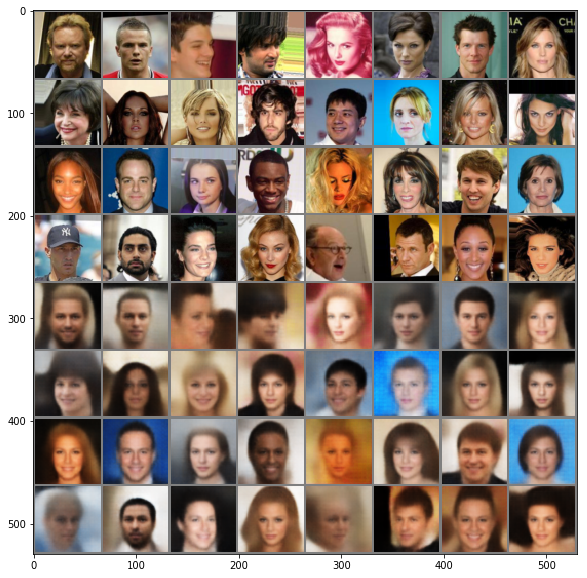

In [5]:
# Plot reconstructions
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10)) 
# Get a batch of data
for batch, labels in test_loader:
    break
    
#get best model,easrly stopping

viz = Visualizer(model)

# Reconstruct data using Joint-VAE model
recon = viz.reconstructions(batch)

# face
recon=np.rollaxis(recon.numpy(), 0, 3)  
print(recon[265:,:,:].max())
recon[:,:,:]=(recon[:,:,:]+1)/2
plt.imshow(recon[:,:,:].astype(float))

#MNIST
# plt.imshow(recon.numpy()[0, :, :].astype(float), cmap='gray')
#plt.savefig(path+"/recon.png")




In [6]:
test_batch = iter(test_loader)
test_batch = next(test_batch)
latent_dist,mask,_ = model.encode(torch.tensor(test_batch[0]).cuda())

print(mask,len(torch.nonzero(mask[0]==0)))

# for latent in latent_dist['cont'][0]:
#     count=torch.zeros((1,32))
#     latent[latent<1e-7]=0
    
#     for i in range(128):
    
#     #print(latent[i].size(),torch.nonzero(latent[i]))#len(torch.nonzero(latent[0]==0))
#         count[latent[i].reshape(1,32)!=0] += 1
#     print(count)
def show_idx(mask):
    a = mask.cpu().detach().numpy().squeeze()
    return np.array(np.where(a==1))+1
    

tensor([[0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
         1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
         1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
         1., 0., 1., 1., 1., 1., 1., 1., 0., 0.]], device='cuda:0',
       grad_fn=<ViewBackward>) 29


/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  app.launch_new_instance()
/data/anaconda/envs/py35/lib/python3.5/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [7]:
def TCR():
    totalc = 0
    for batch, labels in test_loader:
        latent_dist, mask, reg = model.encode(torch.tensor(batch).cuda())
        mean, var = latent_dist['cont'][0]
        cov = covmatrix(mean)
        cov[torch.abs(cov)<=1e-6]=0
        cor = cov2cor(cov)
        totalc += np.sum(cor) 

    return totalc/len(test_loader)

def TCV():
    totalc = 0
    for batch, labels in test_loader:
        latent_dist,mask, reg = model.encode(torch.tensor(batch).cuda())
        mean, var = latent_dist['cont'][0]
        cov = covmatrix(mean).cpu().detach().numpy()
        cov = cov-np.diag(np.diag(cov))
        totalc += np.sum(cov**2) 
        
    return totalc/len(test_loader)


def covmatrix(mean):
    exp_mu = torch.mean(mean, dim=0)  #####mean through batch

    # expectation of mu mu.tranpose
    mu_expand1 = mean.unsqueeze(1)  #####(batch_size, 1, number of mean of latent variables)
    mu_expand2 = mean.unsqueeze(2)  #####(batch_size, number of mean of latent variables, 1) ignore batch_size, only transpose the means
    exp_mu_mu_t = torch.mean(mu_expand1 * mu_expand2, dim=0)

    # covariance of model mean
    cov = exp_mu_mu_t - exp_mu.unsqueeze(0) * exp_mu.unsqueeze(1) 
    return cov
def cov2cor(c):
    #input batch * n_cont
    c = c.cpu().detach()
    d=np.zeros_like(c)
    for i in range(c.shape[0]):
        for j in range(c.shape[1]):
            d[i,j]=c[i,j]/(np.sqrt(c[i,i]*c[j,j]+1e-10))
    return d
tcor=TCR()
tcov=TCV()
print(tcor,tcov)
trainer.evaluate(test_loader)

/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/data/anaconda/envs/py35/lib/python3.5/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


35.18926609687085 0.4980723040658723
Valid Loss: 753.520, Recon Error: 0.036


(753.5200163643315, tensor(0.0360, device='cuda:0', grad_fn=<DivBackward0>))

/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/data/anaconda/envs/py35/lib/python3.5/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


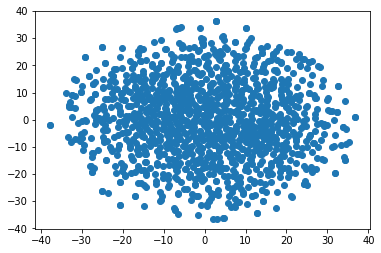

In [8]:
###latent space T-SNE visualization
from sklearn.manifold import TSNE
import numpy as np

samples = torch.zeros(1)
labels = torch.zeros(1)
for i in range(10):
    test_batch = iter(test_loader)
    test_batch = next(test_batch)
    new_labels =torch.tensor(test_batch[1])
    latent_dist,_ ,_= model.encode(torch.tensor(test_batch[0]).cuda())
    new_samples = model.reparameterize(latent_dist)
    if torch.sum(samples) == 0:
        samples =new_samples
        labels = new_labels
    else:
        samples = torch.cat((samples,new_samples),0)
        labels = torch.cat((labels, new_labels),0)
    #print(samples.shape)
    
##latent_varibales should be N,D--->N,2


# latent_variables = samples.reshape(samples[0],-1)
tsne = TSNE(n_components=2)

tsne.fit_transform(samples.detach().cpu().numpy())

plt.scatter(tsne.embedding_[:,0],tsne.embedding_[:,1])
#plt.imshow()

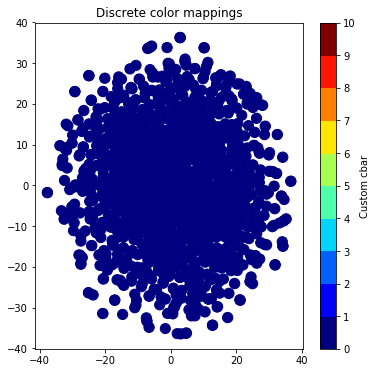

In [9]:
# import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


N = 10 # Number of labels

# setup the plot
fig, ax = plt.subplots(1,1, figsize=(6,6))
# define the data
x = tsne.embedding_[:,0]
y = tsne.embedding_[:,1]
tag = labels# Tag each point with a corresponding label    

# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0,N,N+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
scat = ax.scatter(x,y,c=tag,s=np.random.randint(100,110,N),cmap=cmap,     norm=norm)
# create the colorbar
cb = plt.colorbar(scat, spacing='proportional',ticks=bounds)
cb.set_label('Custom cbar')
ax.set_title('Discrete color mappings')
if not os.path.exists(path):
    os.makedirs(path)
plt.savefig(path+"/scatter.png")
plt.show()




t-SNE demo
import numpy as np
from sklearn.manifold import TSNE
X = np.arange(40).reshape(5,4,2)

X_new = X.reshape(5,-1)
#X = np.array([[[0,0], [0,0], [0,0]], [[0,0], [0,1], [1,1]], [[1,1], [1,0], [0,1]], [[1,1], [1,1], [1,1]]])
print(X.shape,X)
print("--------")
print(X_new)

tsne = TSNE(n_components=2)
tsne.fit_transform(X)
print(tsne.embedding_)

# Plot samples

samples = viz.samples()
plt.imshow(samples.numpy()[0, :174, :], cmap='gray')
print(np.sum(samples.numpy()[0, :174, :]))
print(samples.numpy()[0, :, :].shape)
####origin
4*28

1.0


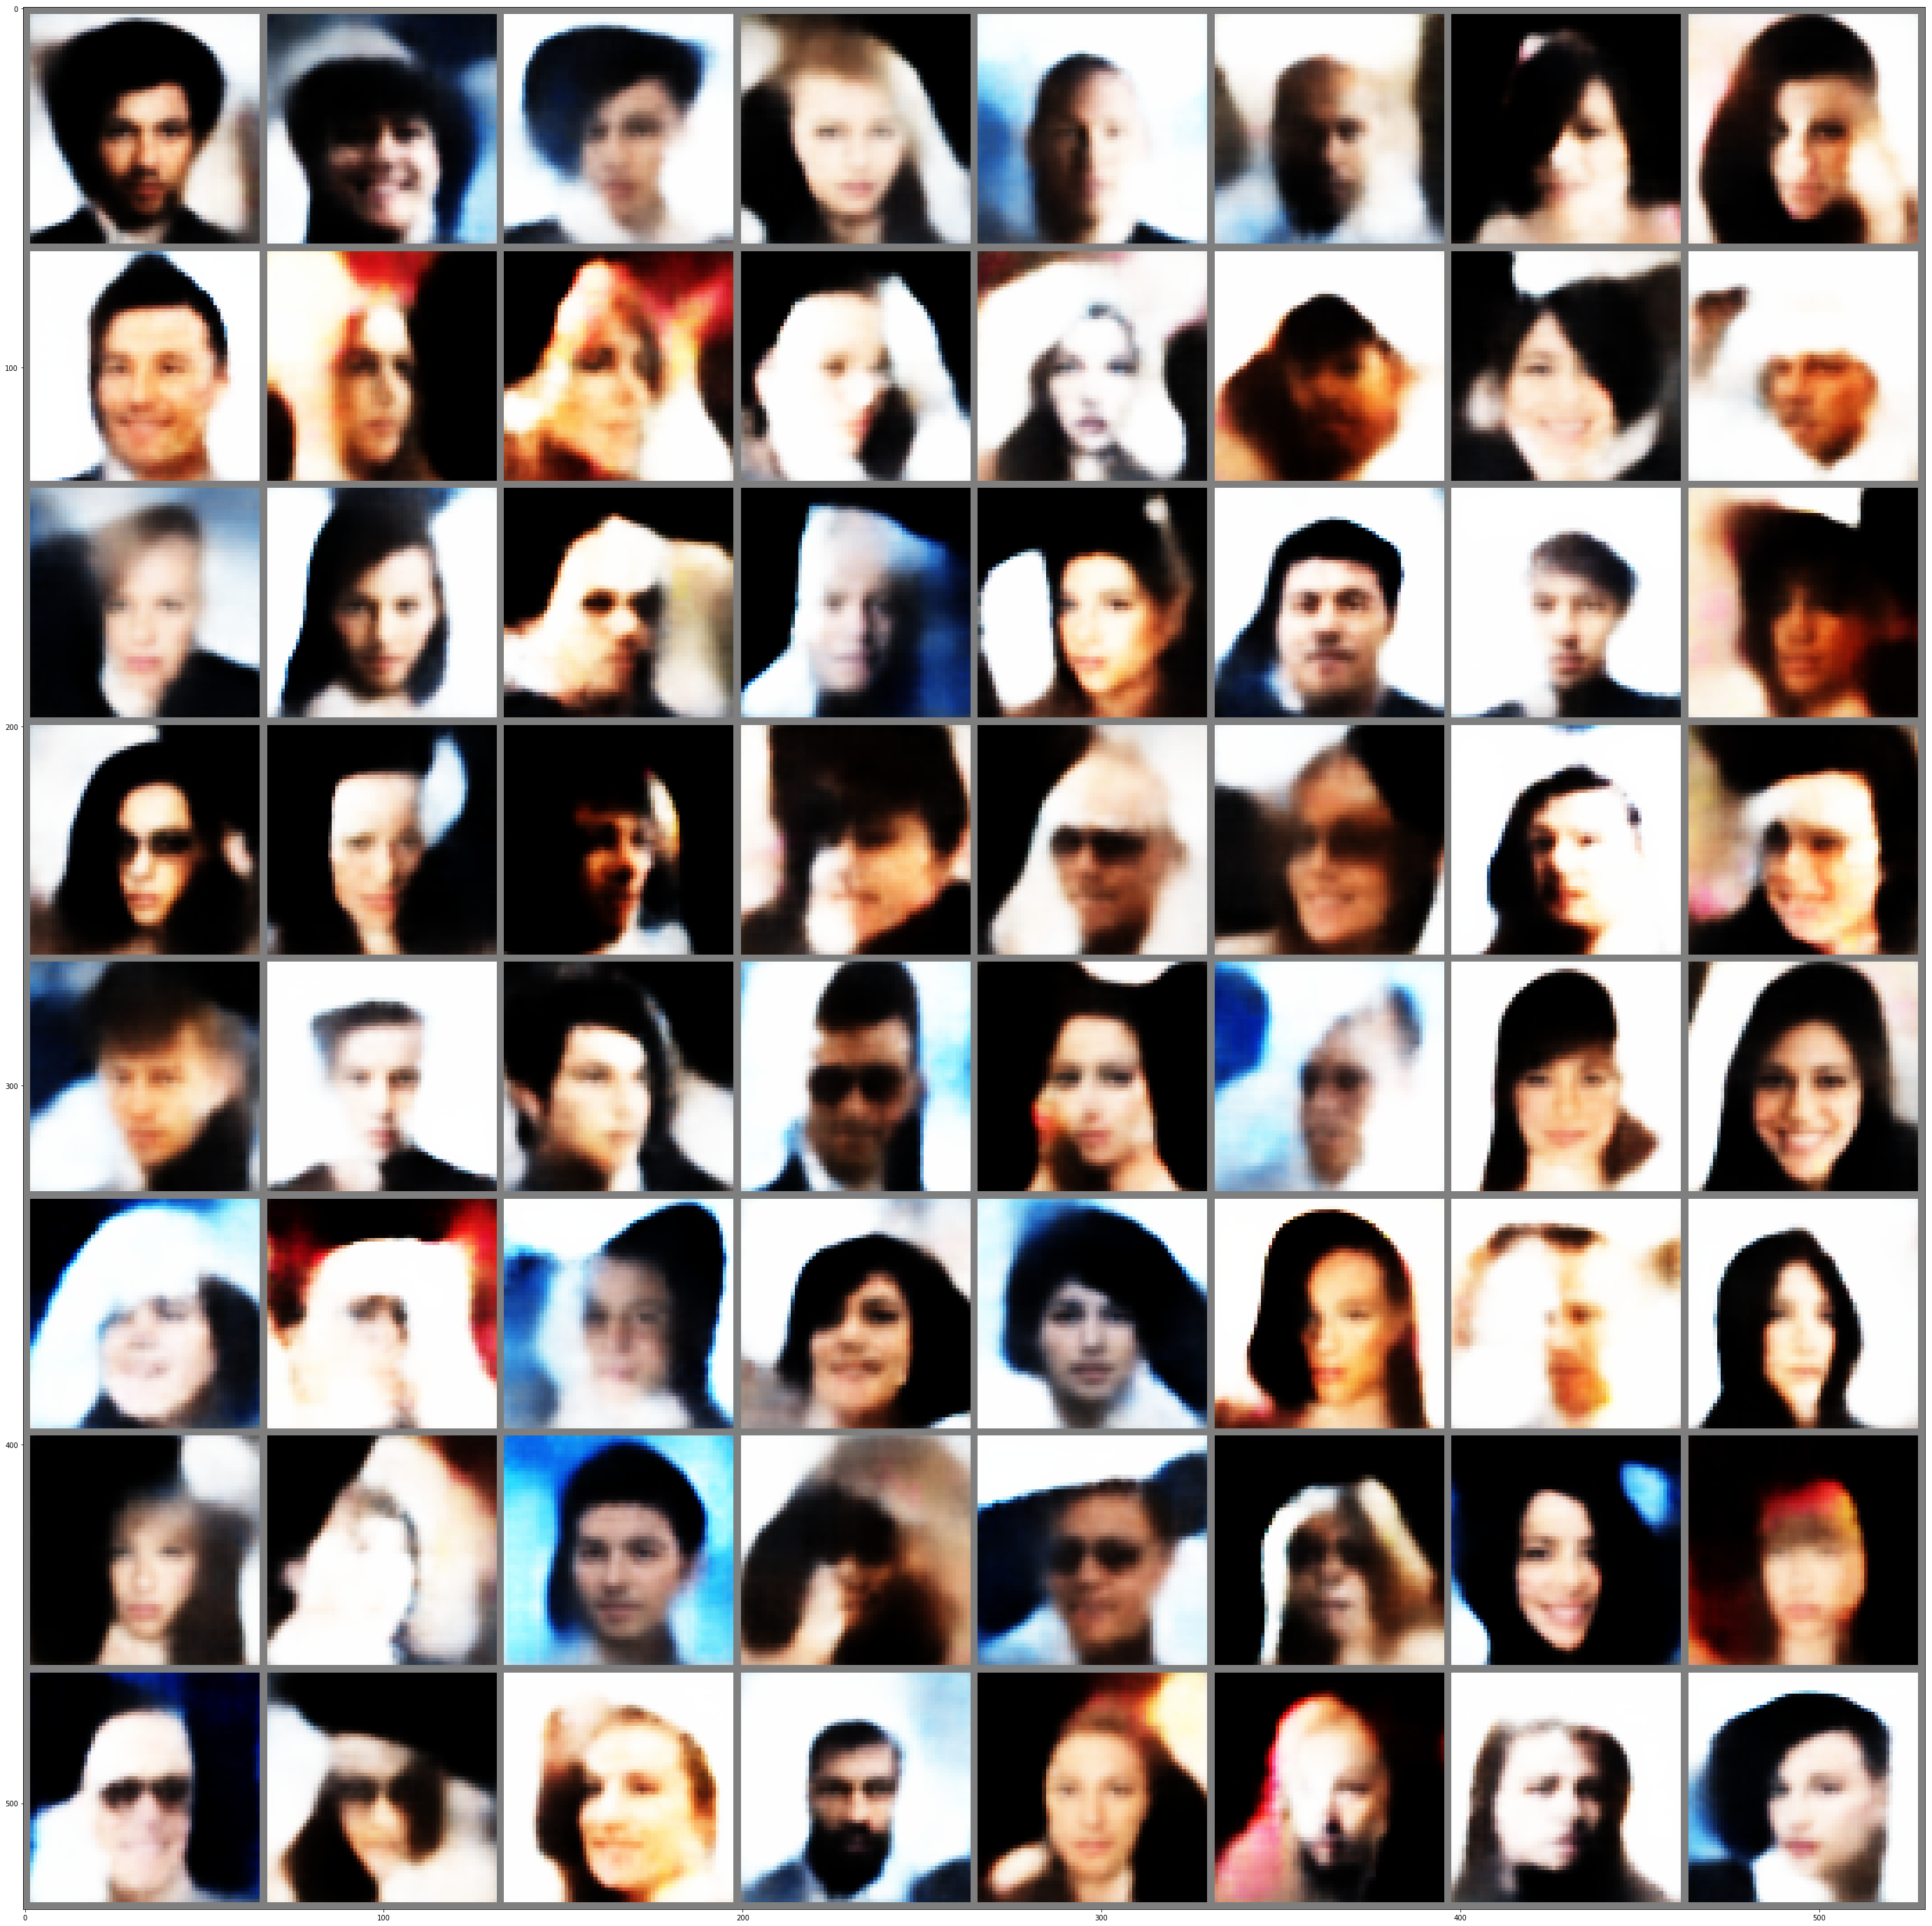

In [10]:
# Plot samples
import matplotlib as mpl

#MNIST
# samples = viz.samples()
# sample=samples.numpy()[0, :, :]/2+0.5
# plt.imshow(sample, cmap='gray')
# plt.imsave(path+"/samples",samples.numpy()[0, :, :]/2+0.5, cmap='gray')



# face
fig = plt.figure(figsize=(50, 50)) 
samples = viz.samples()
samples = np.rollaxis(samples.numpy(), 0, 3)  
print(samples[:,:,0].max())
samples=(samples+1)/2
plt.imshow(samples.astype(float),norm = norm)
plt.imsave(path+"/samples",samples)
###DIP

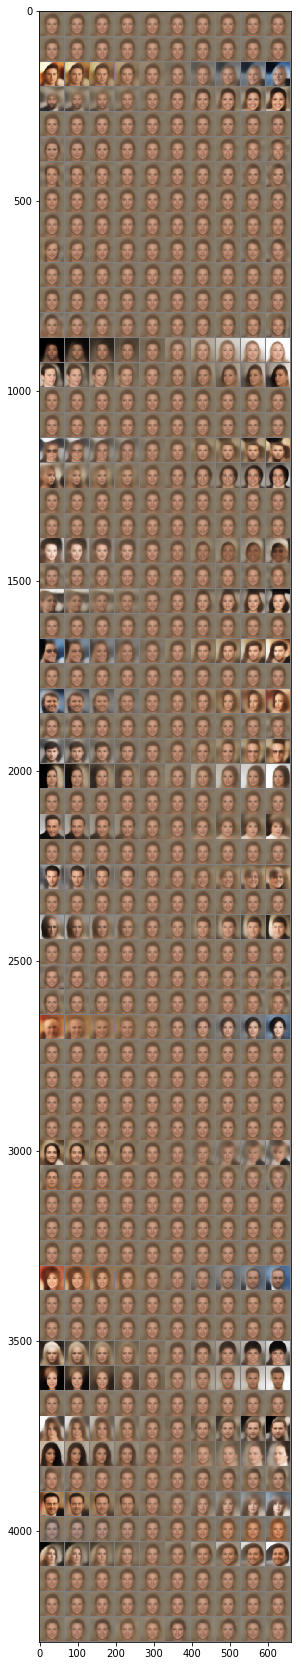

In [11]:
# Plot all traversals
fig = plt.figure(figsize=(30, 30))
traversals = viz.all_latent_traversals(size=10)

#MNIST
# plt.imshow(traversals.numpy()[0, :, :], cmap='gray')
# plt.imsave(path+"/all_traversals",traversals.numpy()[0, :, :], cmap='gray')

#face
traversals = np.rollaxis(traversals.numpy(), 0, 3)  
traversals=(traversals+1)/2
plt.imshow(traversals)
plt.imsave(path+"/all_traversals",traversals)
###dip[0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
#         0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.]

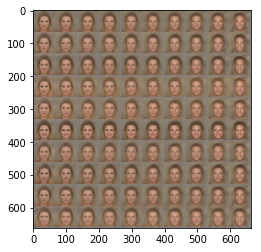

In [12]:
# Plot a grid of some traversals
traversals = viz.latent_traversal_grid(cont_idx=5, cont_axis=1, disc_idx=0, disc_axis=0, size=(10, 10))
#MNIST
# plt.imshow(traversals.numpy()[0, :, :], cmap='gray')
# plt.imsave(path+"/contVSdisc",traversals.numpy()[0, :, :], cmap='gray')

traversals.numpy()[0, :, :].max()
show_idx(mask)
#face
traversals = np.rollaxis(traversals.numpy(), 0, 3)
traversals=(traversals+1)/2
plt.imshow(traversals)
plt.imsave(path+"/contVSdisc",traversals)
##origin

all_t = viz.all_latent_traversals()
print(all_t.shape)
plt.imshow(all_t.numpy()[0, :, :], cmap='gray')
plt.imsave("figures/beta/all_",traversals.numpy()[0, :, :], cmap='gray')

continuous


array([[ 3,  4,  6,  7, 10, 13, 14, 15, 18, 19, 22, 23, 24, 26, 28, 29,
        30, 31, 33, 35, 37, 39, 40, 41, 46, 47, 51, 54, 55, 57, 58, 59,
        60, 61, 62]])

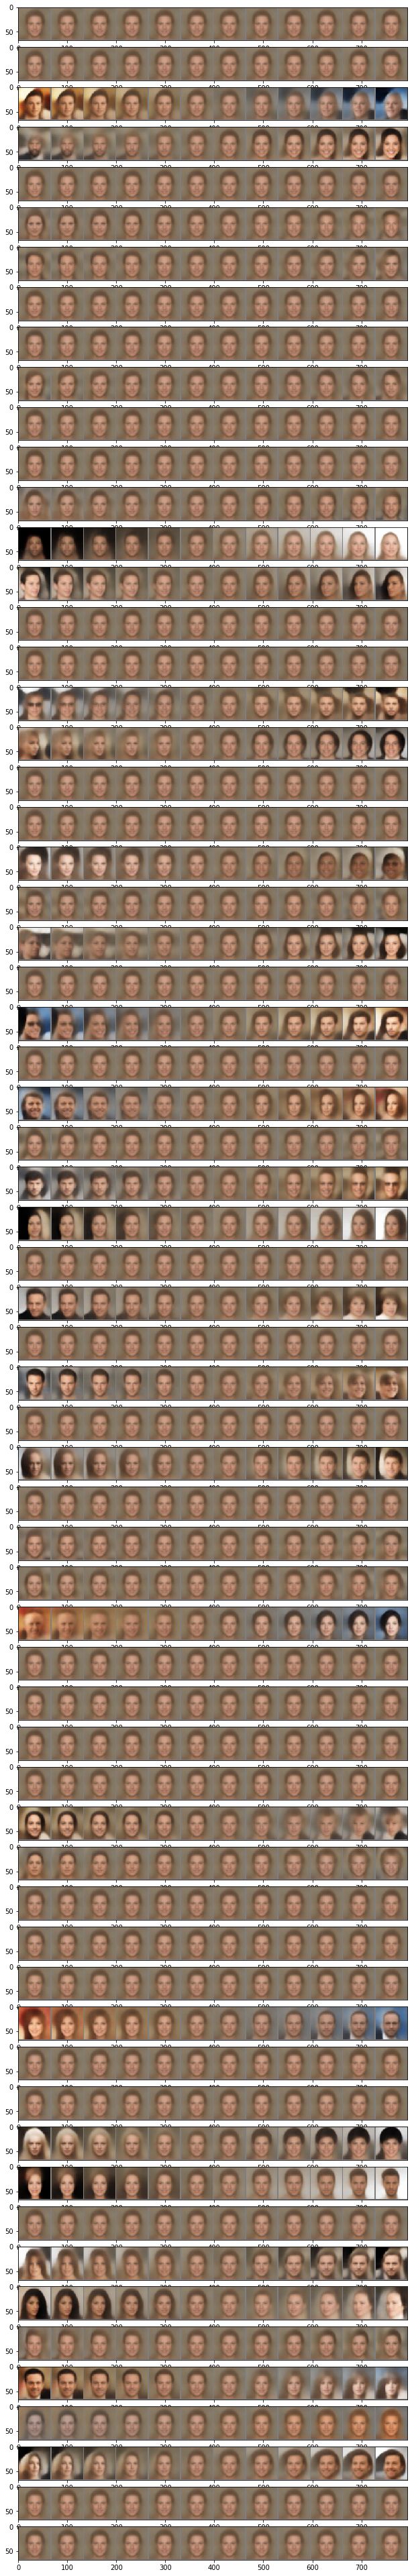

In [13]:
%matplotlib inline
import torch
import numpy as np
# Plot a grid of some traversals

fig = plt.figure(figsize=(70, 70))  # width, height in inches
print("continuous")
for i in range(n_cont):
    traversals = viz.latent_traversal_line(cont_idx=i, disc_idx=None,size=12)
    
    #MNIST
#     sub = fig.add_subplot(n_cont, 1, i + 1)
#     plt.savefig(path+"/cont{}.png".format(i))
#     plt.imshow(traversals.numpy()[0, :, :], cmap='gray')
    
    #FACE
    traversals = np.rollaxis(traversals.numpy(), 0, 3)
    sub = fig.add_subplot(n_cont, 1, i + 1)
    traversals=(traversals+1)/2
    plt.imshow(traversals)   
plt.savefig(path+"/cont.png")

show_idx(mask)
    

discrete


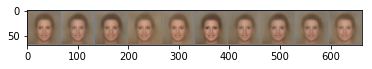

In [14]:
print("discrete")
for i in range(n_disc):
    traversals = viz.latent_traversal_line(cont_idx=None, disc_idx=i,size=10)
    ##MNIST
#     sub = fig.add_subplot(n_disc, 1, i + 1)
#     plt.savefig(path+"/disc{}.png".format(i))
#     plt.imshow(traversals.numpy()[0, :, :], cmap='gray')

    #FACE
    traversals = np.rollaxis(traversals.numpy(), 0, 3)
    sub = fig.add_subplot(n_disc, 1, i + 1)
traversals=(traversals+1)/2
plt.savefig(path+"/disc{}.png".format(i))
plt.imshow(traversals)

In [15]:
import numpy as np
import torch
from latent_traversals import LatentTraverser
from scipy import stats
from torch.autograd import Variable
from torchvision.utils import make_grid, save_image
import numpy as np
import torch
from latent_traversals import LatentTraverser
from scipy import stats
from torch.autograd import Variable
from torchvision.utils import make_grid, save_image

    
# face    
def single_traversal(model,n_cont,cont_idx,cont_v,disc,disc_idx,prior):

        # Generate latent traversal
#         latent_samples = latent_traverser.traverse_line(cont_idx=cont_idx,
#                                                              disc_idx=disc_idx,
#                                                              size=size)
        dim = n_cont + sum(disc)
        if prior:
            latent_samples = torch.tensor(np.random.normal(size=(1, dim)))
        else:
            latent_samples= torch.zeros((1,dim))
            
        latent_samples[:,disc_idx+n_cont-1] = 1.0
        latent_samples[:,cont_idx]=cont_v
        

        # Map samples through decoder
        generated = decode_latents(model, latent_samples.float()).squeeze()
        generated  = np.rollaxis(generated.detach().numpy(), 0, 3)
        generated = (generated +1)/2
        print(generated.min(),generated.max())
        plt.imshow(generated)

        
def decode_latents(model, latent_samples):

        latent_samples = Variable(latent_samples)
        if model.use_cuda:
            latent_samples = latent_samples.cuda()
            result = model.decode(latent_samples).cpu()
        return result

#MNIST
# def single_traversal(model,n_cont,cont_idx,cont_v,disc,disc_idx,prior):

#        # Generate latent traversal
#         latent_samples = latent_traverser.traverse_line(cont_idx=cont_idx,
#                                                              disc_idx=disc_idx,
#                                                              size=size)
#         dim = n_cont + sum(disc)
#         if prior:
#             latent_samples = torch.tensor(np.random.normal(size=(1, dim)))
#         else:
#             latent_samples= torch.zeros((1,dim))
            
#         latent_samples[:,disc_idx+n_cont-1] = 1.0
#         latent_samples[:,cont_idx]=cont_v
        

#         # Map samples through decoder
#         generated = decode_latents(model, latent_samples.float()).squeeze()
#         plt.imshow(generated.detach().numpy(),cmap="gray")

        
# def decode_latents(model, latent_samples):

#         latent_samples = Variable(latent_samples)
#         if model.use_cuda:
#             latent_samples = latent_samples.cuda()
#         return model.decode(latent_samples).cpu()

In [16]:
from ipywidgets import interact, fixed
from IPython.display import display
def interactive_view(model,n_cont,disc):
    
    
    interact(single_traversal,model=fixed(model),
             n_cont=fixed(n_cont), cont_idx=(0,n_cont,1), cont_v=(-2.5,2.5,0.5),
             disc=fixed(disc),disc_idx=(0,9,1),
             prior=True);
             
interactive_view(model,n_cont,disc)
show_idx(mask)

interactive(children=(IntSlider(value=32, description='cont_idx', max=64), FloatSlider(value=0.0, description=…

array([[ 3,  4,  6,  7, 10, 13, 14, 15, 18, 19, 22, 23, 24, 26, 28, 29,
        30, 31, 33, 35, 37, 39, 40, 41, 46, 47, 51, 54, 55, 57, 58, 59,
        60, 61, 62]])